# Project: Fraud Detection

## Phát biểu bài toán

Do tính bảo mật của dữ liệu tài chính nên thiếu các tập dữ liệu công khai có thể được sử dụng để phân tích. Dự án này sử dụng tập dữ liệu tổng hợp và có sẵn công khai trên nền tảng Kaggle, được tạo bằng trình mô phỏng PaySim. Tập dữ liệu này được tạo dựa trên số liệu tổng hợp từ các tập dữ liệu riêng tư của một công ty dịch vụ tài chính di động quốc gia.

Có 100364 bản ghi, bao gồm 11 thuộc tính: 
- Type: Loại giao dịch
- Amount: Số tiền đã giao dịch
- nameOrig and nameDest: ID khách hàng và ID người nhận
- oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest: Số dư cũ và mới của khách hàng và người nhận
- step: Thời gian thực hiện giao dịch
- isFraud: Giao dịch có gian lận hay không

## Mô tả vấn đề

Sử dụng tập dữ liệu có sẵn để xây dựng Dự án xác định giao dịch có gian lận hay không.

## Các bước thực hiện

- **General Overview:** Tổng quan chung về dữ liệu 
- **EDA:** Thực hiện Phân tích dữ liệu thăm dò (EDA) để có những hiểu biết rõ ràng hơn về dữ liệu
- **Data Preprocessing:** Với thông tin thu được sau khi thực hiện EDA, xử lý tiền dữ liệu sao cho phù hợp
- **Model Building:** Sau khi dữ liệu được xử lý, sử dụng dữ liệu này để xây dựng mô hình Học máy
- **Hyperparameter Tuning:** Điều chỉnh tham số của mô hình để có hiệu quả tốt nhất
- **Model Performance:** Đánh giá hiệu suất mô hình dựa trên tập dữ liệu kiểm tra
- **Save the model:** Lưu mô hình có hiệu suất tốt nhất
- **Predictions:** Đưa ra dự đoán trên tập dữ liệu kiểm trau kiểm tra

In [8]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import pickle
import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("sfdffd_s.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100364.000000,1.003640e+05,1.003640e+05,1.003640e+05,1.003640e+05,1.003640e+05,100364.000000,100364.0
mean,418.683472,1.736585e+05,9.153544e+05,9.319331e+05,8.824989e+05,1.185636e+06,0.001156,0.0
std,241.439531,3.440384e+05,2.845281e+06,2.883180e+06,2.404056e+06,2.803142e+06,0.033977,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,210.000000,9.984942e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,419.000000,5.316781e+04,2.014058e+04,0.000000e+00,2.115047e+04,5.119039e+04,0.000000,0.0
75%,628.000000,2.120811e+05,1.944838e+05,2.189381e+05,5.915737e+05,1.062957e+06,0.000000,0.0
max,837.000000,1.000000e+07,3.890000e+07,3.890000e+07,3.400000e+07,3.890000e+07,1.000000,0.0


### TỔNG QUAN CHUNG VỀ BỘ DỮ LIỆU

In [13]:
# Bộ dữ liệu chứa các kiểu dữ liệu 'int64' & 'object' & 'float64'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100364 entries, 0 to 100363
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100364 non-null  int64  
 1   type            100364 non-null  object 
 2   amount          100364 non-null  float64
 3   nameOrig        100364 non-null  object 
 4   oldbalanceOrg   100364 non-null  float64
 5   newbalanceOrig  100364 non-null  float64
 6   nameDest        100364 non-null  object 
 7   oldbalanceDest  100364 non-null  float64
 8   newbalanceDest  100364 non-null  float64
 9   isFraud         100364 non-null  int64  
 10  isFlaggedFraud  100364 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [14]:
# Không có giá trị null nào có trong tập dữ liệu
df.isnull().sum().sum()

0

In [15]:
# Biến mục tiêu bao gồm các giá trị 0 & 1 => phân loại nhị phân
df['isFraud'].unique()

array([0, 1], dtype=int64)

#### Kiểm tra xem dữ liệu có cân bằng hay không?

In [17]:
df['isFraud'].value_counts()

isFraud
0    100248
1       116
Name: count, dtype: int64

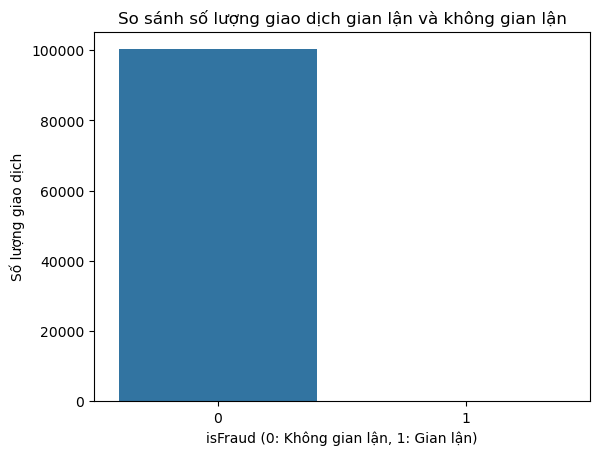

In [18]:
# Vẽ biểu đồ cột cho biến isFraud
sns.countplot(x='isFraud', data=df)
plt.title('So sánh số lượng giao dịch gian lận và không gian lận')
plt.xlabel('isFraud (0: Không gian lận, 1: Gian lận)')
plt.ylabel('Số lượng giao dịch')
plt.show()

In [19]:
#Hiển thị sự mất cân bằng bằng số liệu
fraud_ratio = df['isFraud'].value_counts(normalize=True) * 100
print(f'Tỷ lệ không gian lận: {fraud_ratio[0]:.2f}%')
print(f'Tỷ lệ gian lận: {fraud_ratio[1]:.2f}%')

Tỷ lệ không gian lận: 99.88%
Tỷ lệ gian lận: 0.12%


#### Tỷ lệ phân phối các giá trị mục tiêu ~ 99% - 0,1%, dữ liệu bị mất cân bằng 

Đối với tập dữ liệu tài chính, nếu sử dụng oversampling hoặc undersampling hoặc smote, chúng sẽ tạo ra các điểm dữ liệu giả hoặc trùng lặp. Chúng ta cần thông tin chính xác để có thể đạt được hiệu quả tốt nhất và không gây hiểu nhầm. Để xử lý tập dữ liệu mất cân bằng, chúng ta sẽ sử dụng class_weights, điều này giúp tối ưu hóa điểm cho lớp thiểu số và thuật toán có thể tập trung vào việc giảm lỗi cho lớp thiểu số.

##### Giải thích từ ngữ chuyên ngành
- oversampling: là các phương pháp giúp giải quyết hiện tượng mất cân bằng mẫu bằng cách gia tăng kích thước mẫu thuộc nhóm thiểu số bằng các kĩ thuật khác nhau
- undersampling: là việc ta giảm số lượng các quan sát của nhóm đa số để nó trở nên cân bằng với số quan sát của nhóm thiểu số
- smote: là phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu
- class_weight: trọng số cho class 0 và 1, lớp nào có ít mẫu hơn sẽ được gán trọng số cao hơn và ngược lại

In [21]:
#Xóa các cột không gây ảnh hưởng đến kết quả
df = df.drop(['nameOrig', 'nameDest'],axis=1)

#Chuẩn hóa dữ liệu 
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)

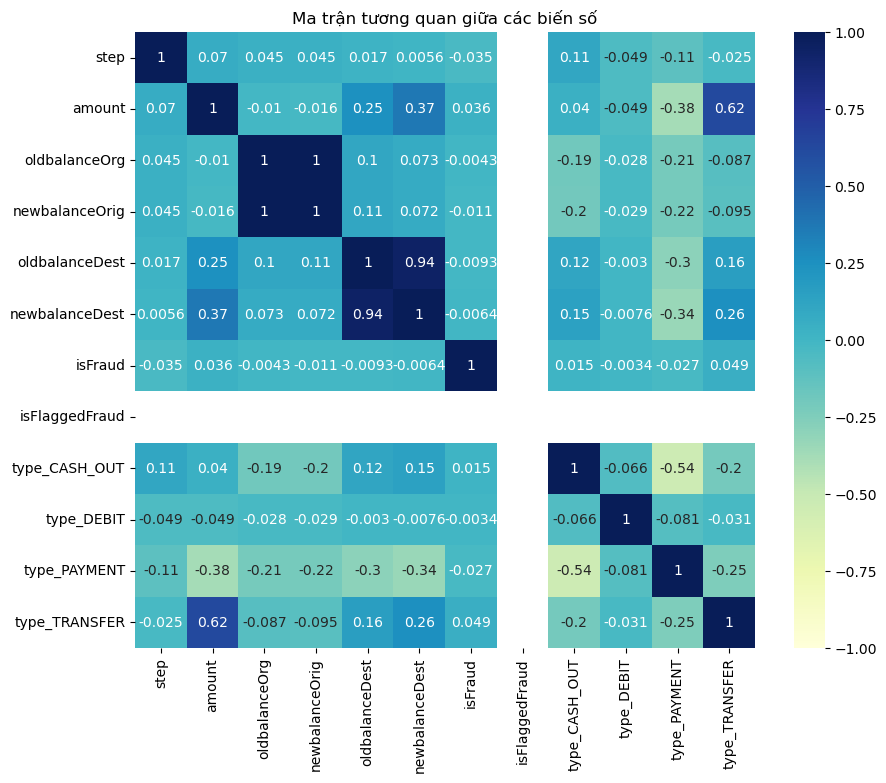

In [22]:
# Tạo lại ma trận tương quan chỉ với các cột số
correlation_matrix = df.corr()

# Vẽ lại biểu đồ heatmap của ma trận tương quan để trực quan hóa
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

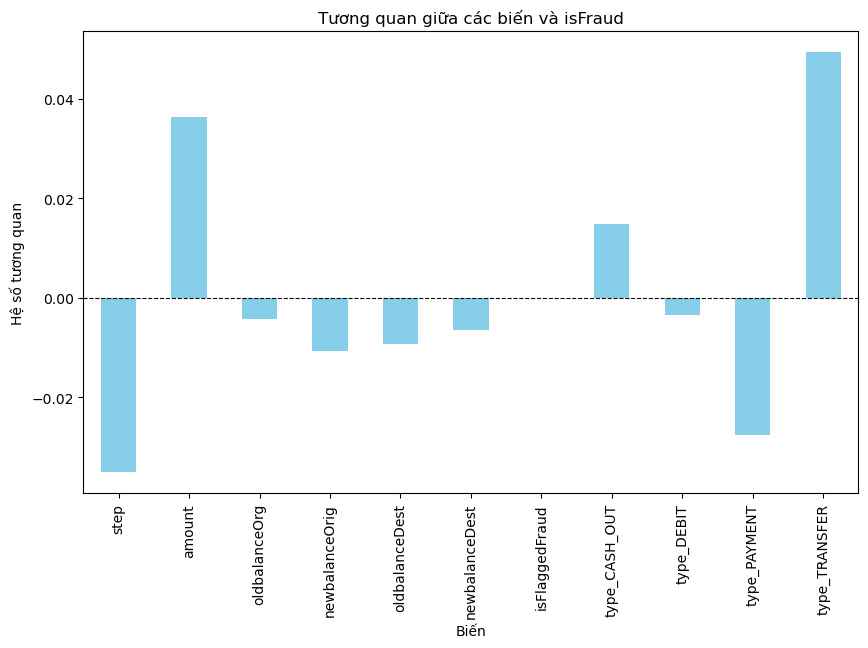

In [23]:
correlation_with_isFraud = df.corr()['isFraud'].drop('isFraud')
plt.figure(figsize=(10, 6))
correlation_with_isFraud.plot(kind='bar', color='skyblue')
plt.title('Tương quan giữa các biến và isFraud')
plt.xlabel('Biến')
plt.ylabel('Hệ số tương quan')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  
plt.show()

##### Phân tích tương quan của các biến với biến mục tiêu isFraud
- type_PAYMENT, type_TRANSFER: Có hệ số tương quan dương cao cho thấy rằng giao dịch thanh toán có nhiều khả năng bị coi là gian lận.
- amount: có tương quan nhẹ với isFraud (0.036) nghĩa là khi giá trị giao dịch tăng, khả năng gian lận có thể tăng nhẹ
- step: Hệ số tương quan âm cao cho thấy rằng quy trình giao dịch phức tạp hơn có thể liên quan đến gian lận.
- isFlaggedFraud: Biến này có liên quan trực tiếp đến gian lận, vì vậy nó cũng được giữ lại.
- Các biến đầu vào của oldbalanceDest và newbalanceDest có tương quan với nhau nên chúng ta phải loại bỏ một trong hai tính năng. Kiểm tra tương quan của chúng với biến phụ thuộc isFraud, oldbalance có tương quan âm cao (-0,0059) với biến mục tiêu hơn newbalanceDest (0,0054) => Loại bỏ biến newbalanceDest
- Tương tự, oldbalanceOrig và newbalanceOrig cũng có tương quan với nhau. Biến newbalanceOrig có tương quan âm cao (-0,0081) với biến mục tiêu hơn oldbalanceOrig (0,01) => Loại bỏ biến oldbalanceOrig
##### Loại bỏ 2 biến newbalanceDest và oldbalanceOrig ra khỏi dữ liệu

### TRỰC QUAN HÓA VÀ PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)

### Trực quan hóa các biến bằng biểu đồ

In [27]:
types = df[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
df['type'] = types.idxmax(axis=1).str.replace('type_', '')
df['type'].value_counts()

type
CASH_OUT    51192
PAYMENT     39576
TRANSFER     8605
DEBIT         991
Name: count, dtype: int64

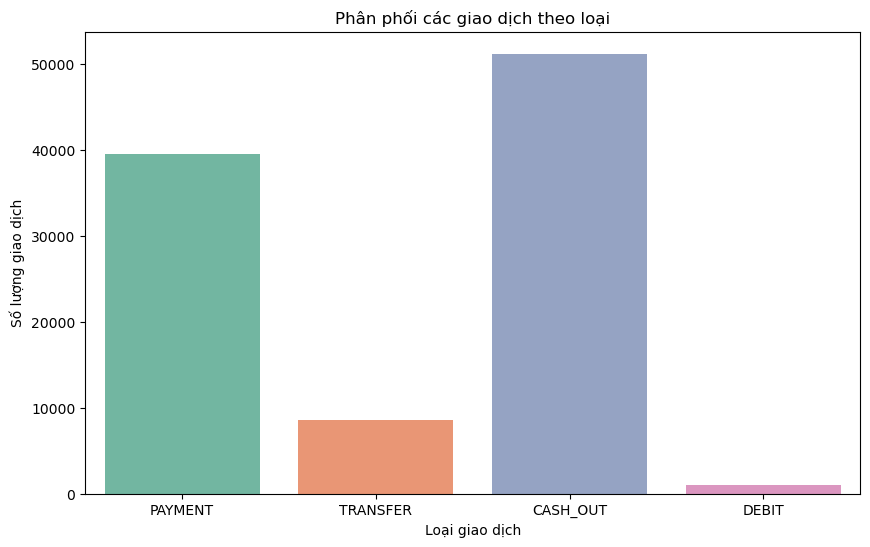

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='Set2')

plt.title('Phân phối các giao dịch theo loại')
plt.xlabel('Loại giao dịch')
plt.ylabel('Số lượng giao dịch')

plt.show()

#### Giao dịch gian lận theo loại giao dịch

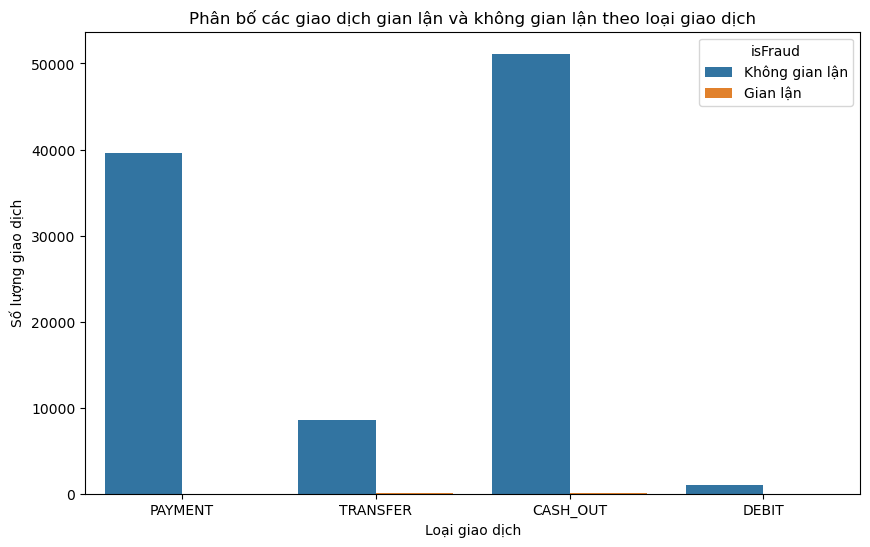

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("Phân bố các giao dịch gian lận và không gian lận theo loại giao dịch")
plt.xlabel("Loại giao dịch")
plt.ylabel("Số lượng giao dịch")
plt.legend(title="isFraud", labels=["Không gian lận", "Gian lận"])
plt.show()

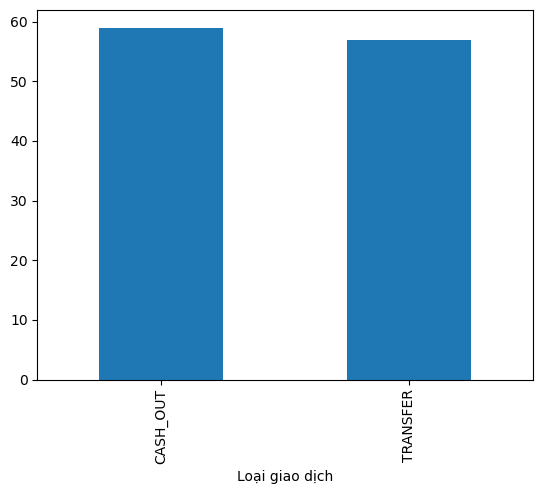

In [31]:
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Loại giao dịch")

plt.show()

##### -> Chỉ có các giao dịch CASH_OUT và TRANSFER mới có thể gian lận

#### Số tiền gian lận theo trạng thái giao dịch

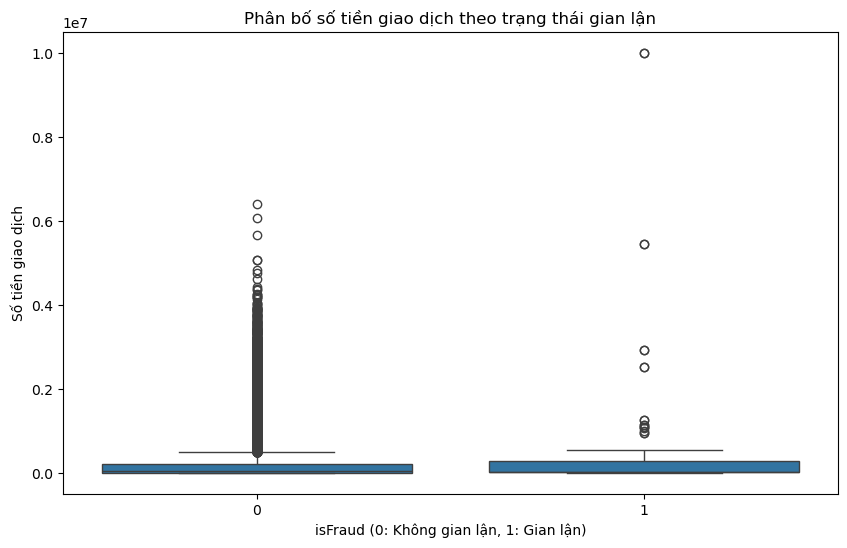

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Phân bố số tiền giao dịch theo trạng thái gian lận")
plt.xlabel("isFraud (0: Không gian lận, 1: Gian lận)")
plt.ylabel("Số tiền giao dịch")
plt.show()

=> Biểu đồ cho thấy rằng các giao dịch gian lận thường có số tiền cao hơn so với các giao dịch gian lận. Đặc biệt, các giao dịch gian lận có xu hướng tập trung ở các giá trị cao của 'amount' trong khi các giao dịch không gian lận phân phối rộng hơn ở các mức thấp và trung bình.

#### Kiểm tra số dư trước và sau giao dịch 

In [37]:
print("Kiểm tra sai lệch trong số dư của tài khoản nguồn và tài khoản đích sau giao dịch:")

df['origBalance_inacc'] = (df["oldbalanceOrg"] - df["amount"] 
                           != df["newbalanceOrig"]).astype(int)
df['destBalance_inacc'] = (df["oldbalanceDest"] + df["amount"] 
                           != df["newbalanceDest"]).astype(int)

print("Tỷ lệ sai lệch số dư (%) tại tài khoản nguồn:", 
      round(df['origBalance_inacc'].value_counts()[1] / df.shape[0] * 100, 2))
print("Tỷ lệ sai lệch số dư (%) tại tài khoản đích:", 
      round(df['destBalance_inacc'].value_counts()[1] / df.shape[0] * 100, 2))

Kiểm tra sai lệch trong số dư của tài khoản nguồn và tài khoản đích sau giao dịch:
Tỷ lệ sai lệch số dư (%) tại tài khoản nguồn: 81.11
Tỷ lệ sai lệch số dư (%) tại tài khoản đích: 92.92


##### Kiểm tra xem biến Amount có luôn dương hay không?

In [39]:
print("Số lượng giao dịch với số tiền nhỏ hơn 0:")
print(len(df[df.amount < 0]))

print("Số lượng giao dịch với số tiền bằng 0:")
print(len(df[df.amount == 0]))

Số lượng giao dịch với số tiền nhỏ hơn 0:
0
Số lượng giao dịch với số tiền bằng 0:
0


=> Không có giao dịch nào được thực hiện khi số tiền nhỏ hơn hoặc bằng 0 => không ảnh hưởng tới isFraud.

#### Tất cả các giao dịch gian lận đều là TRANSFER hoặc CAST_OUT, vì vậy những phương thức thanh toán khác (PAYMENT, CASH_IN, DEBIT) sẽ được đặt là OTHERS

In [42]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'], dtype=object)

In [43]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [44]:
df['type'] = df['type'].map(type_map)

df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

#### Xác định gian lận theo thời gian thực hiện giao dịch

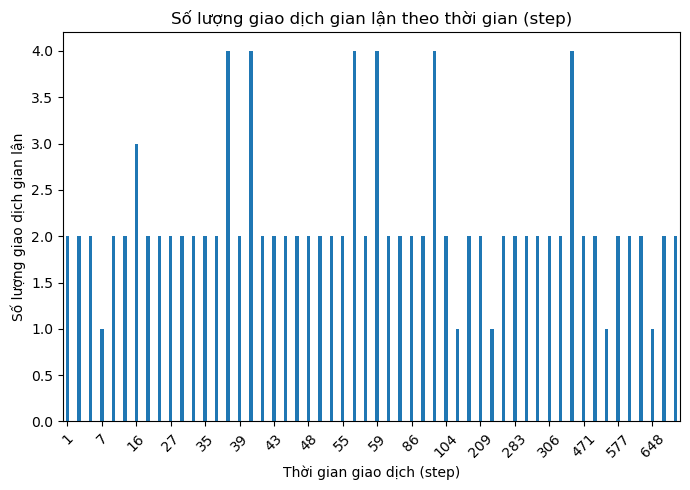

In [46]:
fraud = df['isFraud'] == 1
fraud_time = df[fraud].groupby(['step']).size().plot(kind='bar', figsize=(7, 5), width=0.3)

fraud_time.set_title("Số lượng giao dịch gian lận theo thời gian (step)")
fraud_time.set_xlabel("Thời gian giao dịch (step)")
fraud_time.set_ylabel("Số lượng giao dịch gian lận")

plt.xticks(rotation=45)
fraud_time.set_xticks(range(0, len(df[fraud]['step'].unique()), 3))
plt.tight_layout()
plt.show()

Các giao dịch gian lận được phân bổ khá đồng đều theo thời gian, vì vậy biến này không cung cấp cho ta bất kì thông tin nào có thể tác động đến biến mục tiêu

=> Loại bỏ biến **step**

### Chia tập Train - Test

In [49]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type,origBalance_inacc,destBalance_inacc
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False,OTHERS,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False,OTHERS,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True,TRANSFER,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False,CASH_OUT,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False,OTHERS,0,1


In [50]:
# Xóa các cột không cần thiết 
X = df.drop(columns=['step', 'newbalanceDest','oldbalanceOrg',
                     'isFlaggedFraud','isFraud','type_CASH_OUT', 
                     'type_DEBIT','type_PAYMENT', 'type_TRANSFER'])

X.head()

,amount,newbalanceOrig,oldbalanceDest,type,origBalance_inacc,destBalance_inacc
0,9839.64,160296.36,0.0,OTHERS,0,1
1,1864.28,19384.72,0.0,OTHERS,0,1
2,181.00,0.00,0.0,TRANSFER,0,1
3,181.00,0.00,21182.0,CASH_OUT,0,1
4,11668.14,29885.86,0.0,OTHERS,0,1


In [51]:
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [52]:
y.value_counts()

isFraud
0    100248
1       116
Name: count, dtype: int64

In [53]:
# 33% dữ liệu sẽ được dành cho tập Test, và 67% còn lại sẽ là tập Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### XỬ LÝ DỮ LIỆU

### Chuẩn hóa dữ liệu - One Hot Encoding

#### Xử lý bộ dữ liệu Train

In [57]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)
X_train = pd.concat([X_train, dummies_type], axis=1)
X_train.head()

,amount,newbalanceOrig,oldbalanceDest,type,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
70948,12035.89,9488.11,0.00,OTHERS,0,1,True,False
43830,1863.15,0.00,0.00,OTHERS,1,1,True,False
53708,5750.58,0.00,0.00,OTHERS,1,1,True,False
43544,238601.54,0.00,52664.00,CASH_OUT,1,1,False,False
2269,240680.10,406594.14,4860478.66,CASH_OUT,1,1,False,False


In [58]:
X_train = X_train.drop(columns=['type'])

#### Xử lý bộ dữ liệu Test 

In [60]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)
X_test = pd.concat([X_test, dummies_type], axis=1)
X_test.head()

,amount,newbalanceOrig,oldbalanceDest,type,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
6695,32078.13,12700000.0,40392.82,CASH_OUT,1,1,False,False
24554,23688.66,0.0,0.00,OTHERS,1,1,True,False
25459,8450.10,0.0,0.00,OTHERS,1,1,True,False
1572,6778.32,0.0,0.00,OTHERS,1,1,True,False
87562,2661.35,0.0,0.00,OTHERS,1,1,True,False


In [61]:
X_test = X_test.drop(columns=['type'])

In [62]:
# Kiểm tra xem tất cả các cột trong X_train có giống với các cột trong X_test hay không?
(X_train.columns == X_test.columns).all()

True

### HUẤN LUYỆN MÔ HÌNH

### Mô hình Hồi quy Logistic

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Khởi tạo mô hình Logistic Regression với class_weight "balanced"
balanced_lr = LogisticRegression(class_weight="balanced", random_state=42)

# Huấn luyện mô hình balanced_lr với tập dữ liệu huấn luyện
balanced_lr.fit(X_train, y_train)

# Đánh giá mô hình balanced_lr với tập dữ liệu kiểm tra
print(balanced_lr.score(X_test, y_test))

0.9529301651520183


#### Đánh giá hiệu suất mô hình Hồi quy Logistic

In [67]:
# Dự đoán trên tập kiểm tra
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

# In báo cáo đánh giá
print("Báo cáo đánh giá mô hình hồi quy logistic:")
print(classification_report(y_test, y_pred))

# In ma trận nhầm lẫn
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))


Báo cáo đánh giá mô hình hồi quy logistic:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33089
           1       0.00      0.00      0.00        32

    accuracy                           1.00     33121
   macro avg       0.50      0.50      0.50     33121
weighted avg       1.00      1.00      1.00     33121

Ma trận nhầm lẫn:
[[33089     0]
 [   32     0]]


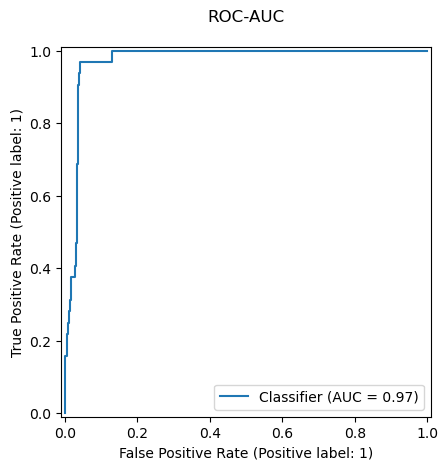

In [68]:
from sklearn.metrics import RocCurveDisplay
y_score = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_score)
plt.title('ROC-AUC\n')
plt.show()

- AUC = 0.97: Giá trị AUC nằm gần 1, cho thấy mô hình phân biệt rất tốt giữa các lớp "fraud" và "not fraud"
- Mô hình có tỷ lệ dương tính thực (TPR) cao và tỷ lệ dương tính giả (FPR) thấp, nghĩa là khả năng phát hiện chính xác các giao dịch gian lận cao mà ít bị nhầm lẫn với các giao dịch hợp lệ

### Mô hình Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import mean_squared_error, r2_score  

# Khởi tạo mô hình RandomForest với class_weight "balanced"
balanced_rf = RandomForestClassifier(class_weight="balanced")

# Huấn luyện mô hình balanced_rf với tập dữ liệu huấn luyện
balanced_rf.fit(X_train, y_train)

# Đánh giá mô hình balanced_rf với tập dữ liệu kiểm tra
print(balanced_rf.score(X_test, y_test))

0.999939615349778


#### Đánh giá hiệu suất mô hình Random Forest

In [73]:
# Dự đoán trên tập kiểm tra
y_pred = RandomForestClassifier().fit(X_train, y_train).predict(X_test)

# In báo cáo đánh giá
print("Báo cáo đánh giá mô hình hồi quy logistic:")
print(classification_report(y_test, y_pred))

# In ma trận nhầm lẫn
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

Báo cáo đánh giá mô hình hồi quy logistic:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33089
           1       0.97      0.97      0.97        32

    accuracy                           1.00     33121
   macro avg       0.98      0.98      0.98     33121
weighted avg       1.00      1.00      1.00     33121

Ma trận nhầm lẫn:
[[33088     1]
 [    1    31]]


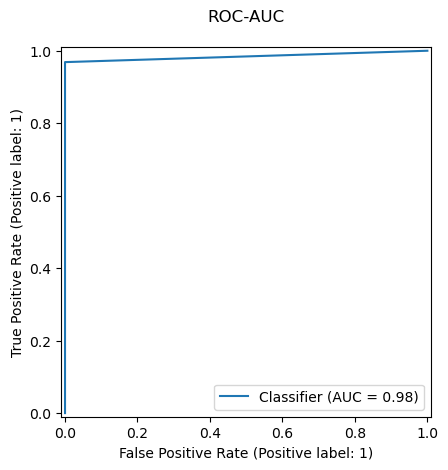

In [74]:
y_score = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_score)
plt.title('ROC-AUC\n')
plt.show()

- AUC = 0.98: Giá trị AUC nằm gần 1, cho thấy mô hình phân biệt rất tốt giữa các lớp "fraud" và "not fraud"
- Mô hình có tỷ lệ dương tính thực (TPR) cao và tỷ lệ dương tính giả (FPR) thấp, nghĩa là khả năng phát hiện chính xác các giao dịch gian lận cao mà ít bị nhầm lẫn với các giao dịch hợp lệ

### LƯU MÔ HÌNH

In [77]:
import joblib

# Lưu mô hình vào file
joblib.dump(balanced_lr, 'final_balanced_lr_model.pkl')
joblib.dump(balanced_rf, 'final_balanced_rf_model.pkl')


['final_balanced_rf_model.pkl']

### ĐƯA RA DỰ ĐOÁN DỰA TRÊN TẬP DỮ LIỆU KIỂM TRA

In [79]:
amount = 20000 # @param {"type":"number"}
newbalanceOrig = 120000 # @param {"type":"number"}
oldbalanceOrig = 90213 # @param {"type":"number"}
origBalance_inacc = 0 # @param {"type":"number"}
destBalance_inacc = 1 # @param {"type":"number"}
type_OTHERS = False
type_TRANSFER = True

data = np.array([[amount, newbalanceOrig, oldbalanceOrig, origBalance_inacc, 
                        destBalance_inacc, type_OTHERS, type_TRANSFER]])

# Dự đoán với mô hình hồi quy logistic đã huấn luyện
prediction = balanced_lr.predict(data)

# In kết quả
print("Dự đoán của mô hình (isFraud):", "Gian lận" if prediction[0] == 1 else "Không gian lận")

Dự đoán của mô hình (isFraud): Gian lận
